In [1]:
import glob
import re
import os
import numpy as np
from torch.utils.data import Dataset
import torch
import torchvision
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import PIL



from src.ds import sigcomp2009, mnist
from src.visualization import *
from src.tools import *

In [21]:
from PIL import ImageDraw



SyntaxError: invalid syntax (2491597398.py, line 3)

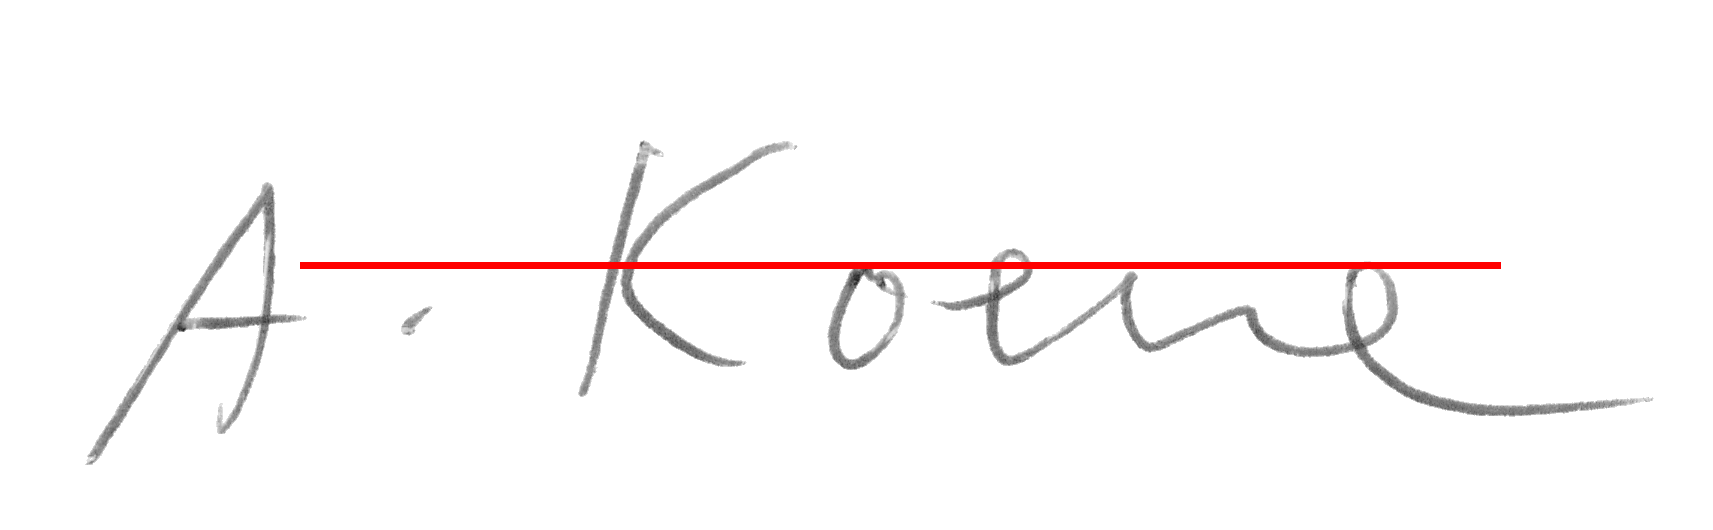

In [23]:
ds = sigcomp2009()
timg = torchvision.io.read_image(ds[0][0])
img = TF.to_pil_image(timg).convert('RGB')
mark_img_line(img, (300, 530//2), (1500, 530//2))
img

In [20]:
img.size

(1713, 530)

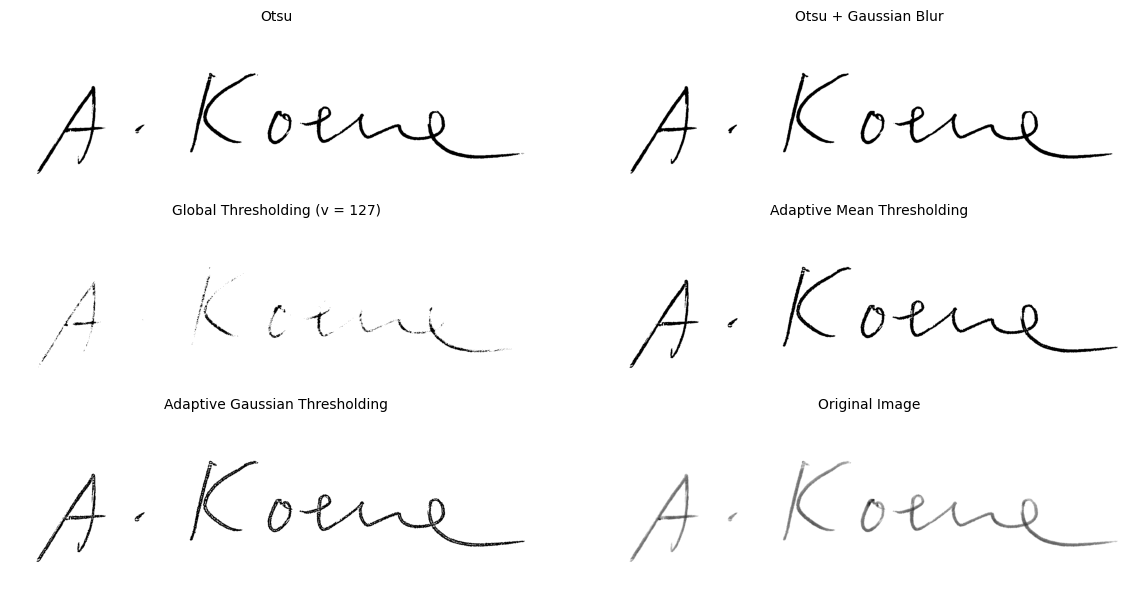

In [2]:
def points_angle(a, o, b):
    """ Angle aob in radians. Points must be np.arrays.  """
    oa = a-o
    ob = b-o
    angle = atan2(np.cross(oa,ob), np.dot(oa,ob))
    return angle

def positive_angle(angle):
    """ Transform -2pi < angle < 2pi to 0 < angle < 2pi. """
    if angle<0:
        return angle + 2*pi
    return angle

def rotate_vector(v, radians):
    """ Roatates vector v (np.array) a given angle. """
    c, s = np.cos(radians), np.sin(radians)
    return np.dot(np.matrix([[c, s], [-s, c]]), v).A1

def points_angle_with_broadcast_2(aM, o, bM):
    """ Returns a vector with bM.shape with points_angle_with(a,o,b) for b in bM """
    oa = aM-o
    ob = bM-o
    c = np.cross(oa,ob)
    d = (ob*oa).sum(axis=1)
    angle = np.arctan2(c, d)
    return angle

def points_angle_with_broadcast_1(a, o, bM):
    """ Returns a vector with bM.shape with points_angle_with(a,o,b) for b in bM """
    oa = a-o
    ob = bM-o
    c = np.cross(oa,ob)
    d = np.dot(ob,oa)
    angle = np.arctan2(c, d)
    return angle